In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision.io import read_image
from torchvision import transforms
from torchvision.transforms import functional as TVF

本 notebook 展示如何使用 PIL 和 torchvision 来对图像做一系列简单的操作. 包括:
- 读取和显示
- PIL 和 tensor 之间的转换
- 对图像的简单变换, 例如: 裁剪, 旋转, 平移, 色相变换, 锐化和去噪...

In [6]:
# IO
img_path = "castle.jpg"

pil_img = Image.open(img_path) # [H,W,C]
np_img = np.array(pil_img)
pt_img = read_image(img_path) # [C,H,W], int8

print(f'pil image shape:', np_img.shape)
print(f'pil image range:', np_img.min(), np_img.max())
print(f'tensor image shape:', pt_img.shape)
print(f'tensor image range:', pt_img.min(), pt_img.max())

pil image shape: (494, 658, 3)
pil image range: 0 255
tensor image shape: torch.Size([3, 494, 658])
tensor image range: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)


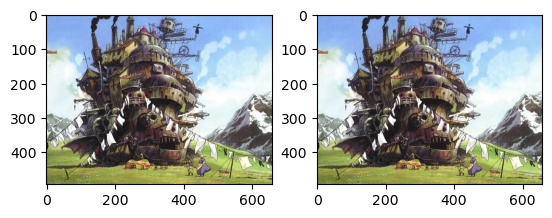

In [7]:
# Display
fig,ax = plt.subplots(1,2)
ax[0].imshow(pil_img)
ax[1].imshow(pt_img.permute(1,2,0))

In [8]:
# PIL to tensor
pt2_img = TVF.pil_to_tensor(pil_img) # intact [0,255], int8
pt3_img = TVF.to_tensor(pil_img) # normalized [0,1], float
print(f'pt2 image range:', pt2_img.min(), pt2_img.max())
print(f'pt3 image range:', pt3_img.min(), pt3_img.max())

# tensor to PIL
pil2_img = TVF.to_pil_image(pt_img)

pt2 image range: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
pt3 image range: tensor(0.) tensor(1.)


要留意一下图片的数据类型, 是 uint8 还是 float32; uint8 类型下像素取值在 0~255, float32 类型下像素取值在 0.~1.

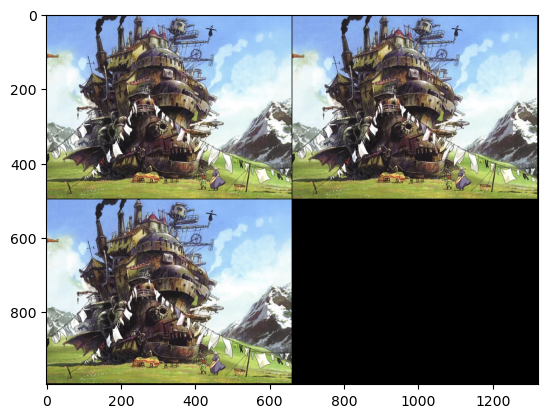

In [9]:
# Display image grid
from torchvision.utils import make_grid

# all images must be the same size
img_grid = make_grid([pt_img/255.0, pt2_img/255.0, pt3_img], nrow=2)
plt.imshow(img_grid.permute(1,2,0))
plt.show()

`torchvision.transforms` 提供了丰富的图像变换功能. 和`torch.nn`一样, 提供了两种范式: 函数式编程的 `functional`和 OOP编程的类.

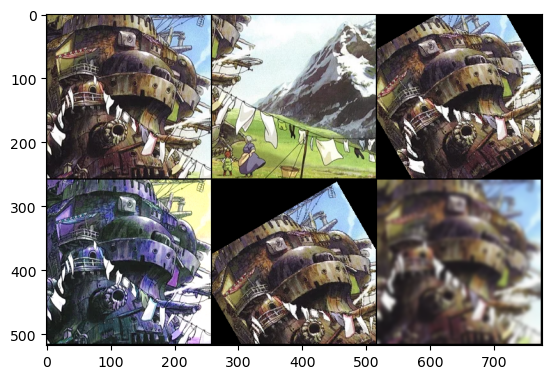

In [10]:
# Transforms
crop_img = TVF.center_crop(pt_img, [256,256])
rand_crop = transforms.RandomCrop([256,256])
rand_crop_img = rand_crop(pt_img)

rot_img = TVF.rotate(crop_img, angle=30)
jitter = transforms.ColorJitter(brightness=0.1, hue=0.5)
jitter_img = jitter(crop_img)

aff_img = TVF.affine(crop_img, angle=-30, translate=[20,50], scale=1, shear=0)
blur_img = TVF.gaussian_blur(crop_img, [15,15])

img_grid2 = make_grid([crop_img, rand_crop_img, rot_img,
                       jitter_img, aff_img, blur_img], nrow=3)

plt.imshow(img_grid2.permute(1,2,0))
plt.show()

In [11]:
# Save image
pil_save = TVF.to_pil_image(img_grid2)
pil_save.save("castle_grid.jpg")

from torchvision.utils import save_image
save_image(img_grid2.float(), "castle_grid2.jpg", normalize=True)

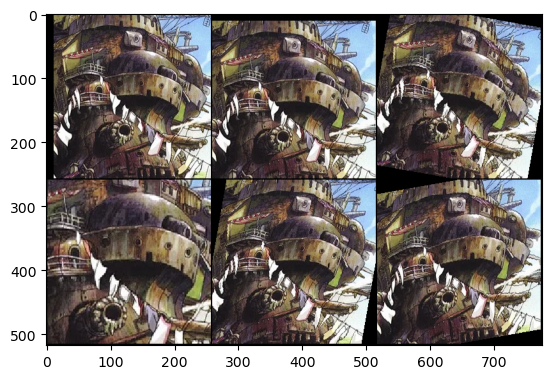

In [ ]:
# More about affine
left_img = TVF.affine(crop_img, angle=0, translate=[10,0], scale=1, shear=0)
up_img = TVF.affine(crop_img, angle=0, translate=[0,10], scale=1, shear=0) # y is down
rot_img = TVF.affine(crop_img, angle=10, translate=[0,0], scale=1, shear=0) # clockwise
scale_img = TVF.affine(crop_img, angle=0, translate=[0,0], scale=1.5, shear=0)
shearx_img = TVF.affine(crop_img, angle=0, translate=[0,0], scale=1, shear=[10,0])
sheary_img = TVF.affine(crop_img, angle=0, translate=[0,0], scale=1, shear=[0,10])

img_grid3 = make_grid([left_img, up_img, rot_img,
                       scale_img, shearx_img, sheary_img], nrow=3)

plt.imshow(img_grid3.permute(1,2,0))
plt.show()